In [1]:
!pip install --upgrade bottleneck


In [2]:
import pandas as pd
import pandas as pd
from textblob import TextBlob
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r"C:\STUDI INDEPENDEN\PROJECT JURNAL\E-COMMERCE\DATA\shopee.csv"
df = pd.read_csv(file_path)
df.head(30)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,585c7062-91cd-414b-8c71-6da40de8e91a,man tap,https://play-lh.googleusercontent.com/a/ACg8oc...,sukses selalu,5,0,3.23.36,2024-04-30 14:12:01,"Hi kak , makasih yaa buat rivew bintangnyaa se...",2024-04-30 16:06:47,3.23.36
1,1,3e7eef0e-61bf-4476-839b-646f142ad713,Aldo Hansibuan,https://play-lh.googleusercontent.com/a-/ALV-U...,Bintang 5 buat Shopee karena selama gw mesen s...,5,0,3.24.14,2024-04-30 14:11:22,"Hi kak , makasih yaa buat rivew bintangnyaa se...",2024-04-30 16:10:54,3.24.14
2,2,5eac6e90-d415-41a7-beea-061f006b370a,habibatul fitriyah,https://play-lh.googleusercontent.com/a-/ALV-U...,tolong kalau toko2 yg tidak bertanggung jawab ...,4,0,3.24.17,2024-04-30 14:11:16,"Hi Kak, maaf bgt buat kendala banyak penipuan ...",2024-04-30 16:14:18,3.24.17
3,3,5560ee63-2cc4-4752-b405-5f3eeb2a7313,tain aja,https://play-lh.googleusercontent.com/a/ACg8oc...,mantappp,5,0,3.05.09,2024-04-30 14:11:11,"Hi kak, waahhh makasih banyak lohh buat bintan...",2024-04-30 16:10:12,3.05.09
4,4,9995dadb-5677-48e6-9348-511951e76a1f,Sri Wahyuni,https://play-lh.googleusercontent.com/a/ACg8oc...,dapet barang ya dapet murah ya,5,0,3.24.17,2024-04-30 14:11:00,"Hi kak, waahhh makasih banyak lohh buat bintan...",2024-04-30 15:59:44,3.24.17
5,5,3d3ad015-7801-45c6-9933-debcf3a0ec3c,Wiwik Andriani,https://play-lh.googleusercontent.com/a/ACg8oc...,mantap cepat dan tepat,5,0,3.24.14,2024-04-30 14:10:37,"Hi kak, waahhh makasih banyak lohh buat bintan...",2024-04-30 15:55:35,3.24.14
6,6,8b3be667-e2e5-4b4b-8d30-e9500ecac8de,Herman Aja,https://play-lh.googleusercontent.com/a/ACg8oc...,"sukses terus buat Shopie, yg selalu membantu d...",5,0,3.24.14,2024-04-30 14:10:19,Yuhuuuuu mimin seneng bangett lohh dengernyaa....,2024-04-30 16:08:37,3.24.14
7,7,ce809349-fa50-4d18-b98a-4ee6912ae013,Wawan Nugroho,https://play-lh.googleusercontent.com/a-/ALV-U...,Shopee recommend,5,0,3.23.36,2024-04-30 14:09:58,"Hi kak, waahhh makasih banyak lohh buat bintan...",2024-04-30 15:54:16,3.23.36
8,8,f3c632bd-538b-4f34-a76a-742fb3e8bfc2,Yola Syahdini,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,NaN,2024-04-30 14:09:45,"Hi kak, thnks buat bintang bintangnya ya. Yuhu...",2024-04-30 15:42:55,NaN
9,9,3eb13186-ee8f-494c-9216-bfeb96ee6d97,Sarpono ajah,https://play-lh.googleusercontent.com/a-/ALV-U...,ok,4,0,3.24.14,2024-04-30 14:09:43,"Hi kak, thnks buat bintang bintangnya ya. Yuhu...",2024-04-30 16:03:49,3.24.14


In [4]:
selected_column = ['content','score']
df = df[selected_column]
df

,content,score
0,sukses selalu,5
1,Bintang 5 buat Shopee karena selama gw mesen s...,5
2,tolong kalau toko2 yg tidak bertanggung jawab ...,4
3,mantappp,5
4,dapet barang ya dapet murah ya,5
...,...,...
791,Shopeepay ku uangnya ga bisa d pake alasan aku...,1
792,"1 Bintang aja buat SHOPEE, KECEWA PAKE BANGET....",1
793,Untuk sementara baik,5
794,Mending ekspedisi shopee ekspress mu itu di ha...,1


In [5]:
df.rename(columns= {'content': 'text'}, inplace=True)

In [6]:
# proses case folding 
def casefolding(Review):
    Review = Review.lower()
    return Review
df['text'] = df['text'].apply(casefolding)
df.head(10)

,text,score
0,sukses selalu,5
1,bintang 5 buat shopee karena selama gw mesen s...,5
2,tolong kalau toko2 yg tidak bertanggung jawab ...,4
3,mantappp,5
4,dapet barang ya dapet murah ya,5
5,mantap cepat dan tepat,5
6,"sukses terus buat shopie, yg selalu membantu d...",5
7,shopee recommend,5
8,good,5
9,ok,4


In [7]:

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)
    # Menghapus spasi ekstra
    text = re.sub(r'\s+', ' ', text)
    # Menghapus mention
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # removing mentions
    # Menghapus hashtag
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # removing hastag
    text = re.sub(r'RT[\s]+', '', text)  # removing RT
    text = re.sub(r"http\S+", '', text)  # removing link
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    text = re.sub(r'\b\w{1,3}\b','',text)

    text = re.sub(r'[^A-Za-z]+', ' ', text)  # removing all character non alphabet

    text = text.replace('\n', ' ')  # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation))  # removing all punctuations
    text = text.strip(' ')

    return text
df['text'] = df['text'].apply(preprocess_text)

In [8]:
# -------CLEAN NUMBER----------
def clean_numbers(x):

    x = re.sub('[0-9]{5,}', '#####', x)
    x = re.sub('[0-9]{4}', '####', x)
    x = re.sub('[0-9]{3}', '###', x)
    x = re.sub('[0-9]{2}', '##', x)
    return x
df['text'] = df['text'].apply(lambda x: clean_numbers(x))

In [9]:
!gdown --id 1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y

slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

C:\DATA SCIENCE\Anaconda\Lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y
To: C:\Users\DIKY\7. STUPEN - JURNAL\slang.txt

  0%|          | 0.00/32.8k [00:00<?, ?B/s]
100%|##########| 32.8k/32.8k [00:00<00:00, 1.34MB/s]


In [10]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [11]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [12]:
clean_text = []
for review in df['text']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [13]:
from nltk.tokenize import word_tokenize
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
df['text'] = df['text'].apply(word_tokenize_wrapper)
df.head()

,text,score
0,"[sukses, selalu]",5
1,"[bintang, buat, shopee, karena, selama, mesen,...",5
2,"[tolong, kalau, toko, tidak, bertanggung, jawa...",4
3,[mantappp],5
4,"[dapet, barang, dapet, murah]",5


In [14]:
! pip install Sastrawi

In [15]:
!pip install gdown

In [16]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ

C:\DATA SCIENCE\Anaconda\Lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
To: C:\Users\DIKY\7. STUPEN - JURNAL\lexicon_positive_ver1.csv

  0%|          | 0.00/41.4k [00:00<?, ?B/s]
100%|##########| 41.4k/41.4k [00:00<00:00, 1.13MB/s]


In [17]:
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

C:\DATA SCIENCE\Anaconda\Lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju
To: C:\Users\DIKY\7. STUPEN - JURNAL\lexicon_negative_ver1.csv

  0%|          | 0.00/82.8k [00:00<?, ?B/s]
100%|##########| 82.8k/82.8k [00:00<00:00, 655kB/s]
100%|##########| 82.8k/82.8k [00:00<00:00, 655kB/s]


In [19]:
import csv

lexicon_positive = dict()
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Menambahkan nilai untuk kata yang telah diberikan
lexicon_positive.update({
    'bagus': 4,
    'membantu': 2,
    'mantap': 4,
    'sangat mantap': 5,
    'mantapss': 4,
    'memuaskan': 4,
    'sangat': 0,
    'mantaapp': 4,
    'berbelanja': 3,
    'belanja': 2,
    'baik': 1
})


lexicon_negative.update({
    'bagus': 4,
    'membantu': 2,
    'mantap': 4,
    'sangat mantap': 5,
    'mantapss': 4,
    'memuaskan': 4,
    'sangat': 0,
    'mantaapp': 4,
    'berbelanja': 3,
    'belanja': 2,
    'mantab':2,
    'baik': 1,
    'sangat': 0,
    'cepat':3,
    'memudahkan':2,
    'murah':2,
    'oke':1,
    'mantaps':1,
    'keren':3,
    'best':2,
    'boongan':-7,
    'mulu':-3,
    'nipu':-8,
    'recommend':2,
    'mantappp':2
})


def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word_pos in text:
        if word_pos in lexicon_positive:
            score += lexicon_positive[word_pos]
    for word_neg in text:
        if word_neg in lexicon_negative:
            score += lexicon_negative[word_neg]
    polarity = ''
    if score >= 0:
        polarity = 'positif'
    else:
        polarity = 'negatif'

    return score, polarity


# def sentiment_analysis_lexicon_indonesia(text):
#     score = 0
#     for word_pos in text:
#         if word_pos in lexicon_positive:
#             score += lexicon_positive[word_pos]
#     for word_neg in text:
#         if word_neg in lexicon_negative:
#             score += lexicon_negative[word_neg]
#     polarity = ''
#     if score > 0:
#         polarity = 'positif'
#     elif score < 0:
#         polarity = 'negatif'
#     else:
#         polarity = 'netral'

#     return score, polarity


In [20]:
results = df['text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
positif    538
negatif    258
Name: count, dtype: int64


In [21]:
df[(df['polarity']=='positif')]

,text,score,polarity_score,polarity
0,"[sukses, selalu]",5,3,positif
1,"[bintang, buat, shopee, karena, selama, mesen,...",5,1,positif
3,[mantappp],5,2,positif
4,"[dapet, barang, dapet, murah]",5,9,positif
5,"[mantap, cepat, tepat]",5,14,positif
...,...,...,...,...
788,"[shopee, best, apapun, mslhnya, smua, terseles...",5,2,positif
789,"[semuax, sudah, bagus, hanya, satu, sayang, ke...",4,7,positif
790,"[sejauh, masih, baik, baik]",4,4,positif
791,"[shopeepay, uangnya, bisa, pake, alasan, akunn...",1,0,positif


In [22]:
df[(df['polarity']=='negatif')]

,text,score,polarity_score,polarity
2,"[tolong, kalau, toko, tidak, bertanggung, jawa...",4,-11,negatif
11,"[lebih, baik, beli, jangan, beli, dengan, pemb...",1,-12,negatif
25,[jelas],1,-2,negatif
30,"[luar, biasa]",5,-2,negatif
45,"[peraturan, shopee, banyak, merugikan, penjual...",1,-10,negatif
...,...,...,...,...
782,"[semakin, kesini, malah, makin, kesono, daftar...",1,-13,negatif
787,"[jangan, belanja, shopee, belanja, shopee, foo...",1,-5,negatif
792,"[bintang, buat, shopee, kecewa, pake, banget, ...",1,-7,negatif
793,"[untuk, sementara, baik]",5,-2,negatif


In [23]:
df[(df['polarity']=='netral')]

,text,score,polarity_score,polarity


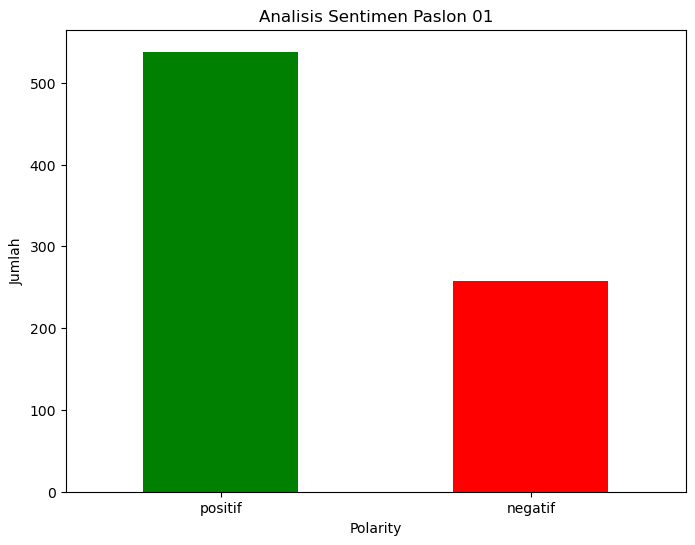

In [24]:
polarity_counts = df['polarity'].value_counts()

# Visualisasi diagram batang
plt.figure(figsize=(8, 6))
polarity_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Analisis Sentimen Paslon 01')
plt.xlabel('Polarity')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [25]:
# Lokasi file CSV
file_normalisasi = r"C:\SEM VI\MACHINE LEARNING\normalisasi.csv"

# Muat DataFrame dari file CSV
normalizad_word = pd.read_csv(file_normalisasi)

# Lakukan normalisasi seperti yang Anda lakukan sebelumnya
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# df['text'] harus sudah didefinisikan sebelumnya

df['text'] = df['text'].apply(normalized_term)

# Menampilkan hasil normalisasi
for text in df['text'].head(20):
    print(text)

['sukses', 'selalu']
['bintang', 'buat', 'shopee', 'karena', 'selama', 'mesen', 'selalu', 'sesuai', 'ekspektasi']
['tolong', 'kalau', 'toko', 'tidak', 'bertanggung', 'jawab', 'jangan', 'dimasukkan', 'shopee', 'soalnya', 'sekarang', 'banyak', 'toko', 'fiktifnya', 'shopee']
['mantappp']
['dapet', 'barang', 'dapet', 'murah']
['mantap', 'cepat', 'tepat']
['sukses', 'terus', 'buat', 'shopie', 'selalu', 'membantu', 'dalam', 'segala']
['shopee', 'recommend']
['good']
[]
['sangat', 'berguna', 'berbelanja', 'online', 'sangat', 'membantu']
['lebih', 'baik', 'beli', 'jangan', 'beli', 'dengan', 'pembayaran', 'transfer', 'karena', 'penjual', 'akan', 'mengirimkan', 'orderannya', 'seenaknya', 'sendiri', 'kalau', 'pembeli', 'yang', 'punya', 'kuasa', 'barang', 'diterima', 'atau', 'ditolak']
['bagus']
['belanja', 'shopee', 'sangat', 'memuaskan', 'banyak', 'diskon']
['mantap']
['mantaps', 'surantap']
['recomended', 'banget']
['sangat', 'berguna']
['suka', 'blanja', 'online', 'dishopee']
['sangat', 'baik'

C:\Users\DIKY\AppData\Local\Temp\ipykernel_16416\1258145021.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
C:\Users\DIKY\AppData\Local\Temp\ipykernel_16416\1258145021.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


In [26]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stemming(ulasan) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

df['stemming_ulasan'] = df['text'].apply(stemming)
df[['stemming_ulasan']]
for text in df['stemming_ulasan'].head(20):
    print(text)

sukses selalu
bintang buat shopee karena lama mesen selalu sesuai ekspektasi
tolong kalau toko tidak tanggung jawab jangan masuk shopee soal sekarang banyak toko fiktif shopee
mantappp
dapet barang dapet murah
mantap cepat tepat
sukses terus buat shopie selalu bantu dalam segala
shopee recommend
good

sangat guna belanja online sangat bantu
lebih baik beli jangan beli dengan bayar transfer karena jual akan kirim order enak sendiri kalau beli yang punya kuasa barang terima atau tolak
bagus
belanja shopee sangat muas banyak diskon
mantap
mantaps surantap
recomended banget
sangat guna
suka blanja online dishopee
sangat baik


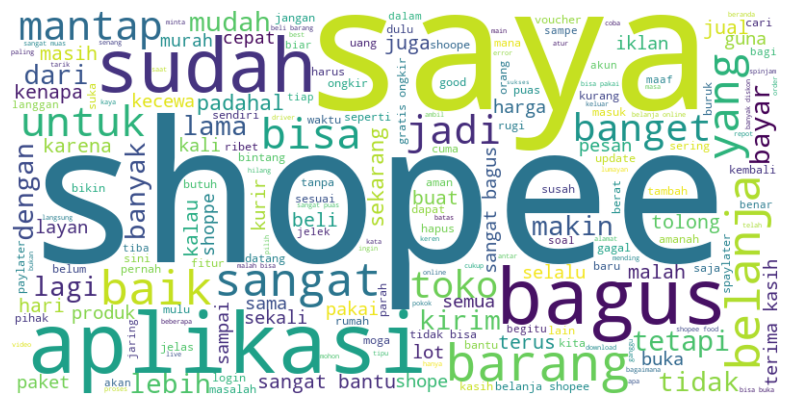

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the stemmed text in the 'stemming_ulasan' column
text_combined = ' '.join(df['stemming_ulasan'].values)
generate_wordcloud(text_combined)


In [28]:
from collections import Counter

# Tokenize the text to get individual words
words = text_combined.split()

# Count the frequency of each word
word_freq = Counter(words)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(10)  # Change 10 to however many top words you want to display

# Display the most common words
print("Top 10 most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq} ")


Top 10 most common words:
shopee: 189 
sangat: 132 
saya: 123 
bagus: 102 
aplikasi: 96 
bisa: 91 
belanja: 90 
barang: 84 
sudah: 75 
baik: 61 


In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = pd.read_csv("C:\SEM VI\MACHINE LEARNING\stopwordbahasa.csv")
def stopword_removal(Review):
    filtering = stopwords.words('indonesian','english')
    filtering.extend(sw)
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, Review)
    for x in fit:
        data.append(x)
    return data
df['text'] = df['text'].apply(stopword_removal)
df.head(20)
# Menampilkan hasil normalisasi
for text in df['text'].head(20):
    print(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIKY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['sukses']
['bintang', 'shopee', 'mesen', 'sesuai', 'ekspektasi']
['tolong', 'toko', 'bertanggung', 'dimasukkan', 'shopee', 'toko', 'fiktifnya', 'shopee']
['mantappp']
['dapet', 'barang', 'dapet', 'murah']
['mantap', 'cepat']
['sukses', 'shopie', 'membantu']
['shopee', 'recommend']
['good']
[]
['berguna', 'berbelanja', 'online', 'membantu']
['beli', 'beli', 'pembayaran', 'transfer', 'penjual', 'mengirimkan', 'orderannya', 'pembeli', 'kuasa', 'barang', 'diterima', 'ditolak']
['bagus']
['belanja', 'shopee', 'memuaskan', 'diskon']
['mantap']
['mantaps', 'surantap']
['recomended', 'banget']
['berguna']
['suka', 'blanja', 'online', 'dishopee']
[]


In [30]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stemming(ulasan) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

df['stemming_ulasan'] = df['text'].apply(stemming)
df[['stemming_ulasan']]
for text in df['stemming_ulasan'].head(20):
    print(text)

sukses
bintang shopee mesen sesuai ekspektasi
tolong toko tanggung masuk shopee toko fiktif shopee
mantappp
dapet barang dapet murah
mantap cepat
sukses shopie bantu
shopee recommend
good

guna belanja online bantu
beli beli bayar transfer jual kirim order beli kuasa barang terima tolak
bagus
belanja shopee muas diskon
mantap
mantaps surantap
recomended banget
guna
suka blanja online dishopee



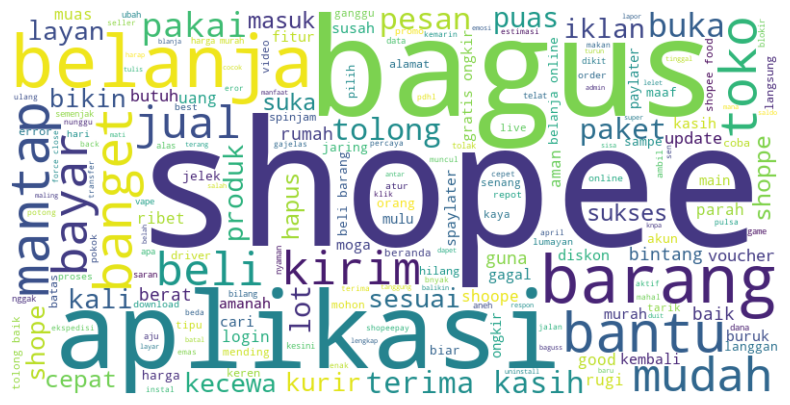

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the stemmed text in the 'stemming_ulasan' column
text_combined = ' '.join(df['stemming_ulasan'].values)
generate_wordcloud(text_combined)


In [32]:
from collections import Counter

# Tokenize the text to get individual words
words = text_combined.split()

# Count the frequency of each word
word_freq = Counter(words)

# Get the most common words and their frequencies
most_common_words = word_freq.most_common(10)  # Change 10 to however many top words you want to display

# Display the most common words
print("Top 10 most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq} ")


Top 10 most common words:
shopee: 189 
bagus: 102 
aplikasi: 96 
belanja: 90 
barang: 84 
bantu: 48 
mantap: 45 
banget: 44 
beli: 43 
toko: 42 


In [34]:
df.to_csv(r"C:\STUDI INDEPENDEN\PROJECT JURNAL\E-COMMERCE\DATA\2.SHOPEE-FINAL-TESTING.csv")